In [1]:
import pandas as pd

In [2]:
# corona.csv 파일을 로드 (첫번째 열을 인덱스로 사용)
df = pd.read_csv("../csv/corona.csv", index_col=0)
df.head(1)

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 0 to 819
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   createDt    820 non-null    object 
 1   deathCnt    820 non-null    int64  
 2   decideCnt   820 non-null    int64  
 3   seq         820 non-null    int64  
 4   stateDt     820 non-null    int64  
 5   stateTime   820 non-null    object 
 6   updateDt    817 non-null    object 
 7   accExamCnt  692 non-null    float64
 8   accDefRate  623 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 64.1+ KB


In [4]:
# df에서 createDt컬럼의 타입을 시계열데이터로 변경 

# 데이터프레임에서 특정 컬럼의 데이터만 추출 
# pd.to_datetime(df.loc[0, 'createDt'])
# 스리즈 데이터 형태에서 문자열 내장함수 사용하는 방법?
# Series.upper() -> 에러 발생[series에 upper()함수가 존재하지 않는다.]
# Series.str.upper() -> 정상적으로 함수가 호출
# df['createDt'].dt.strptime('%Y-%m-%d %H:%M:%S')
df['createDt'].map(
    lambda x : pd.to_datetime(x)
)

0     2022-06-08 09:09:05.982
1     2022-06-07 09:09:00.897
2     2022-06-06 09:00:06.734
3     2022-06-05 08:53:19.426
4     2022-06-04 08:56:49.219
                ...          
815   2020-03-14 00:00:00.000
816   2020-03-13 00:00:00.000
817   2020-03-12 00:00:00.000
818   2020-03-11 00:00:00.000
819   2020-03-10 00:00:00.000
Name: createDt, Length: 820, dtype: datetime64[ns]

In [5]:
df['createDt'] = pd.to_datetime(df['createDt'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 0 to 819
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   createDt    820 non-null    datetime64[ns]
 1   deathCnt    820 non-null    int64         
 2   decideCnt   820 non-null    int64         
 3   seq         820 non-null    int64         
 4   stateDt     820 non-null    int64         
 5   stateTime   820 non-null    object        
 6   updateDt    817 non-null    object        
 7   accExamCnt  692 non-null    float64       
 8   accDefRate  623 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 64.1+ KB


In [7]:
# 시계열 데이터에서 요일만 추출 -> 새로운 파생변수를 생성
df['week'] = df['createDt'].dt.weekday

In [8]:
df['week'].value_counts()

week
2    118
1    118
6    118
5    117
4    117
0    116
3    116
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [10]:
# df에서 일일 확진자 컬럼을 생성 
# 날짜를 기준으로 오름차순 정렬
df.sort_values('createDt', inplace=True)
# 인덱스를 초기화
df.reset_index(drop=True, inplace=True)
# 일일확진자 컬럼을 생성하여 전날의 데이터와의 차이를 대입 
df['일일확진자'] = df['decideCnt'].diff().fillna(0)
df.head()

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate,week,일일확진자
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,1,0.0
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,2,242.0
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,3,114.0
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,4,110.0
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5,107.0


In [11]:
# 요일별 일일확진자의 평균 수치가 얼마나 되는가?
group_data = df[['week', '일일확진자']].groupby('week').mean()

In [12]:
# 그래프 시각화에서 한글깨짐 방지 
import platform
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

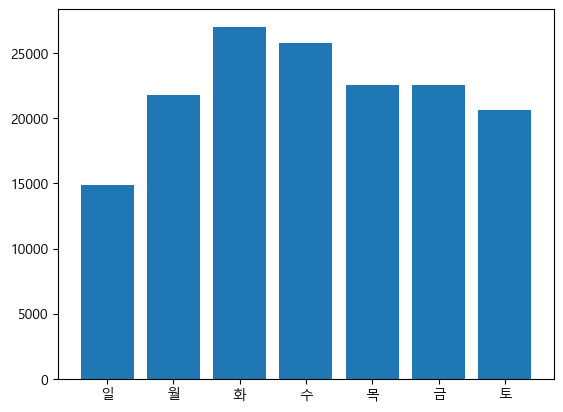

In [13]:
# 요일별 데이터를 막대그래프 시각화
x = group_data.index
y = group_data['일일확진자']
plt.bar(x, y)
# x축 데이터를 변경 
plt.xticks(x, ['일', '월', '화', '수', '목', '금', '토'])
plt.show()